In [ ]:
# 시간의 흐름에 따라 관찰되는 데이터
# 전반적인 평균과 분산이 시간에 따라 안정되게 분산되어 있어야 분석에 용이함
# 그러지 않을 경우 차분difference를 통해 안정적으로 변환한 후 분석

<AxesSubplot:>

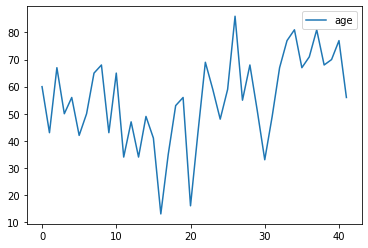

In [1]:
import pandas as pd
%matplotlib inline

df = pd.read_csv("/Users/ian/Desktop/Study/data/time/kings.csv", header=None, names=["age"])
df.plot()

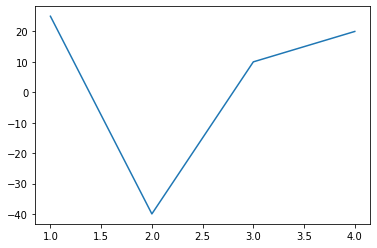

In [2]:
import matplotlib.pyplot as plt

a = pd.Series([1025, 1050, 1010, 1020, 1040])
b = a.diff(periods=1).iloc[1:]
plt.plot(b)

In [ ]:
# 최신 statsmodels과 최신 pmdarima랑 잘 안 맞아서 statsmodels의 버전을 다운해서 써야함
# pip install statsmodels==0.11.0

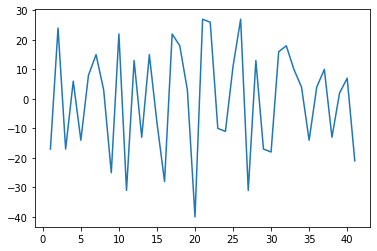

In [3]:
import matplotlib.pyplot as plt

# 나이를 1차 차분. 현재 자료에서 직전 자료를 뺌
# 원본 데이터의 그래프와 비교해보면 이 그래프가 훨씬 안정적임. 원본 그래프는 분산이 너무 큼!
diff1 = df["age"].diff(periods=1).iloc[1:]
diff1.plot()
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

# 원본 데이터에 로그를 취해서 1차 차분함
diff1 = np.log(df["age"]).diff(periods=1).iloc[1:]
result = adfuller(diff1) # 안정적인 시계열 데이터인지 확인하는 함수 adfuller()
print(result)
print('ADF Statistic : %f' % result[0]) # adf 통계량
print('p-value : %f' % result[1]) # p-value

(-7.446856429613949, 5.8076608997337256e-11, 2, 38, {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}, 32.204960096784966)
ADF Statistic : -7.446856
p-value : 0.000000


In [5]:
from pmdarima.arima import auto_arima

# 위의 과정을 자동화시켜주는 함수가 auto_arima()
# arima(p, d, q)로 제시해줌
model = auto_arima(df)
model

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [6]:
# 시계열 데이터는 학습용 검증용 데이터의 순서를 섞으면 안 됨
# 1부터 30을 학습용, 31부터 끝까지는 검증용
train = df[:30]
test = df[30:]
print(len(df["age"]))
print(df["age"].values)

42
[60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59
 48 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56]


In [7]:
from statsmodels.tsa.arima_model import ARIMA

# arima(p, d, q)가 0,1,1 나왔기 때문에 그대로 집어넣음
model = ARIMA(train, order=(0,1,1)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.18505D+00    |proj g|=  5.78222D-03

At iterate    5    f=  4.18466D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      7      1     0     0   0.000D+00   4.185D+00
  F =   4.1846636660578271     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [8]:
# steps=5는 이후 값 5개를 예측해보라는 것
fore = model.forecast(steps=5)
print(fore)

(array([59.52326645, 59.71740845, 59.91155045, 60.10569245, 60.29983445]), array([15.67413929, 16.19266148, 16.69508698, 17.18282784, 17.65710101]), array([[28.80251796, 90.24401494],
       [27.98037514, 91.45444177],
       [27.18978126, 92.63331965],
       [26.42796873, 93.78341617],
       [25.69255241, 94.9071165 ]]))


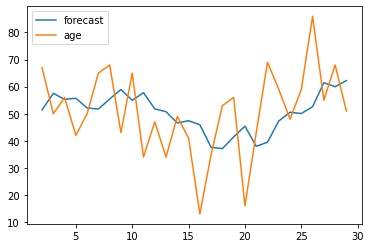

In [9]:
model.plot_predict()
plt.show()

In [10]:
fc, se, conf = model.forecast(steps=len(test)) # 모델에 검증용 데이터를 다 집어넣음. fc가 예측값, se가 오차, conf가 하한값, 상한값
print(test["age"].values)
print(fc)

[33 49 67 77 81 67 71 81 68 70 77 56]
[59.52326645 59.71740845 59.91155045 60.10569245 60.29983445 60.49397645
 60.68811845 60.88226045 61.07640245 61.27054445 61.46468645 61.65882845]


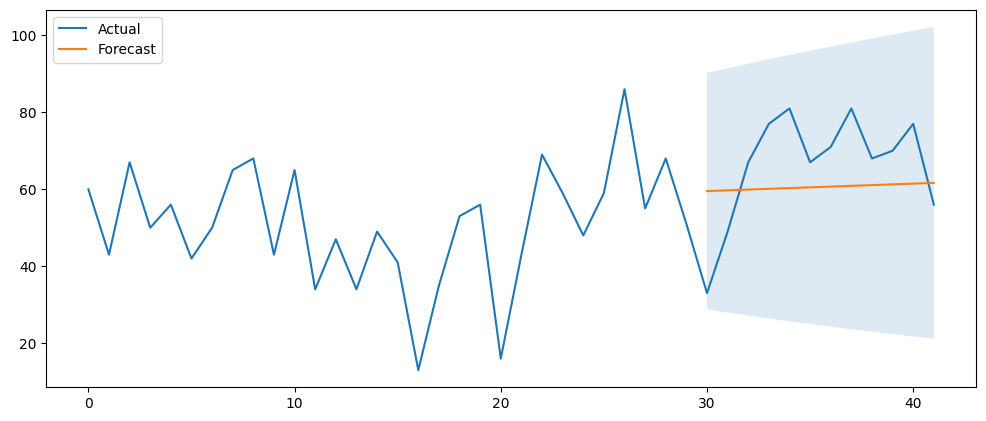

In [11]:
fc_series = pd.Series(fc, index=test.index)
lower = pd.Series(conf[:, 0], index=test.index) # 하한값
upper = pd.Series(conf[:, 1], index=test.index) # 상한값

plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label="Actual")
plt.plot(fc_series, label="Forecast")
plt.fill_between(lower.index, lower, upper, alpha=.15)
plt.legend(loc='upper left')
plt.show()

In [ ]:
# 시계열 데이터 분석 많이 돌리는 건 지금 해본 arima
# 딥러닝으로도 가능~ 뒤에 배움 ~ 순환신경망RNN이라는 녀석을 배울거랭

In [ ]:
# 나일강 유량 예측

<AxesSubplot:>

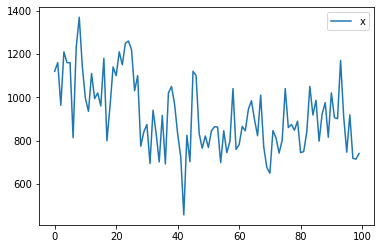

In [12]:
import pandas as pd
%matplotlib inline

df = pd.read_csv("/Users/ian/Desktop/Study/data/time/nile.csv")
df.plot()

<AxesSubplot:>

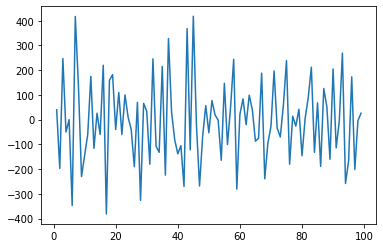

In [13]:
# 1차 차분

diff1 = df['x'].diff(periods=1).iloc[1:]
diff1.plot()

In [14]:
# 로그 취하고 1차 차분

from statsmodels.tsa.stattools import adfuller
import numpy as np

diff1 = np.log(df['x']).diff(periods=1).iloc[1:]
result = adfuller(diff1) # 안정적인 시계열 데이터인지 확인
print(result)
print('ADF : %f'%result[0])
print('P-VALUE : %f'%result[1])

(-4.748414786012481, 6.818878743916458e-05, 9, 89, {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}, -64.46023083112888)
ADF : -4.748415
P-VALUE : 0.000068


In [15]:
from pmdarima.arima import auto_arima

model = auto_arima(df, suppress_warnings=True)
model

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [16]:
n = int(df.shape[0]*.8) # df.shape의 [0]는 행의 개수. n행의 80% 계산
train = df[:n]
test = df[n:]
print(len(df['x']))
print(train['x'].values)
print(test['x'].values)

100
[1120 1160  963 1210 1160 1160  813 1230 1370 1140  995  935 1110  994
 1020  960 1180  799  958 1140 1100 1210 1150 1250 1260 1220 1030 1100
  774  840  874  694  940  833  701  916  692 1020 1050  969  831  726
  456  824  702 1120 1100  832  764  821  768  845  864  862  698  845
  744  796 1040  759  781  865  845  944  984  897  822 1010  771  676
  649  846  812  742  801 1040  860  874  848  890]
[ 744  749  838 1050  918  986  797  923  975  815 1020  906  901 1170
  912  746  919  718  714  740]


In [17]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train, order=(1,1,1)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.38200D+00    |proj g|=  5.86136D-03

At iterate    5    f=  6.37969D+00    |proj g|=  1.36318D-03

At iterate   10    f=  6.37935D+00    |proj g|=  4.10783D-04

At iterate   15    f=  6.37934D+00    |proj g|=  2.72671D-05

At iterate   20    f=  6.37934D+00    |proj g|=  2.66454D-07

At iterate   25    f=  6.37934D+00    |proj g|=  1.59872D-06

At iterate   30    f=  6.37934D+00    |proj g|=  1.95399D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


In [18]:
fore = model.forecast(steps=5)
print(fore)
# 예측값, 오차, 하한/상한값

(array([801.85327906, 769.07600937, 755.14350577, 747.62474116,
       742.28886636]), array([139.37089818, 147.22762452, 148.11274749, 148.21560535,
       148.22774512]), array([[ 528.69133812, 1075.01521999],
       [ 480.51516778, 1057.63685096],
       [ 464.84785503, 1045.43915651],
       [ 457.12749272, 1038.1219896 ],
       [ 451.76782442, 1032.80990831]]))


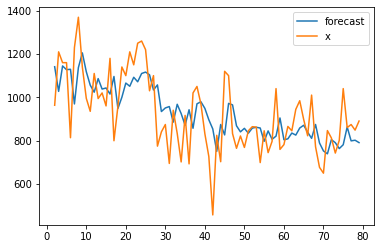

In [19]:
model.plot_predict()
plt.show()

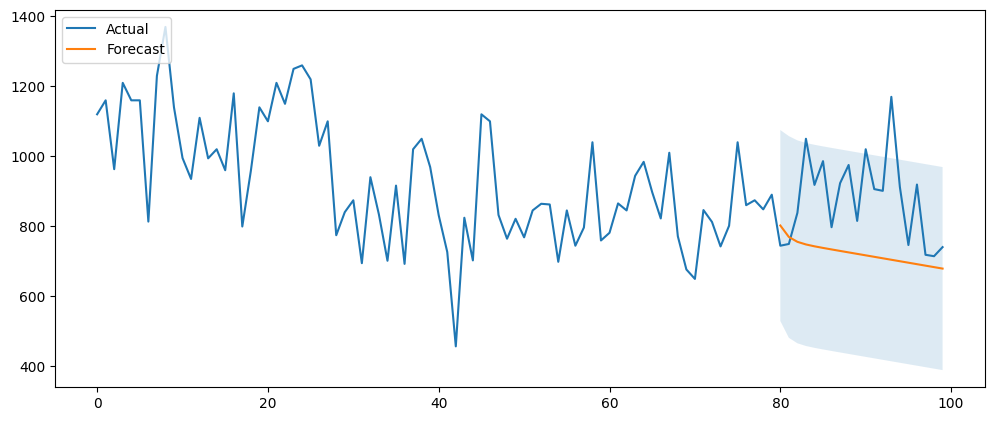

In [20]:
fc, se, conf = model.forecast(steps=len(test))
fc_series = pd.Series(fc, index=test.index)
lower = pd.Series(conf[:, 0], index=test.index)
upper = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label="Actual")
plt.plot(fc_series, label="Forecast")
plt.fill_between(lower.index, lower, upper, alpha=.15)
plt.legend(loc='upper left')
plt.show()

In [ ]:
# 오존량 예측

In [22]:
import pandas as pd

df = pd.read_csv("/Users/ian/Desktop/Study/data/ozone/ozone_2.csv")
df

,Ozone,Solar.R,Wind,Temp,Result,Month,Day
0,41.00000,190.000000,7.4,67.0,0.0,5,1
1,36.00000,118.000000,8.0,72.0,0.0,5,2
2,12.00000,149.000000,12.6,74.0,0.0,5,3
3,18.00000,313.000000,11.5,62.0,0.0,5,4
4,42.12931,185.931507,14.3,56.0,0.0,5,5
...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70.0,0.0,9,26
149,42.12931,145.000000,13.2,77.0,1.0,9,27
150,14.00000,191.000000,14.3,75.0,0.0,9,28
151,18.00000,131.000000,8.0,76.0,0.0,9,29


<AxesSubplot:>

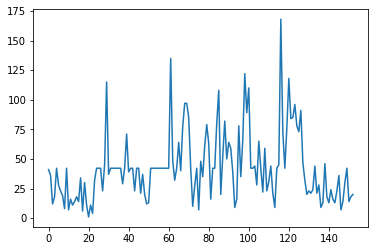

In [23]:
df["Ozone"].plot()

<AxesSubplot:>

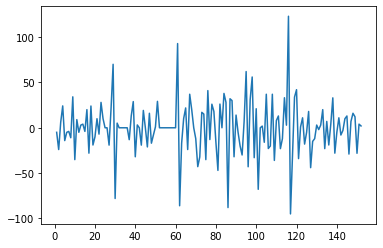

In [24]:
diff1 = df['Ozone'].diff(periods=1).iloc[1:]
diff1.plot()

In [25]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

diff1 = np.log(df['Ozone']).diff(periods=1).iloc[1:]
result = adfuller(diff1)
print(result)
print('ADF : %f'%result[0])
print('P-VALUE : %f'%result[1])

(-9.189875590717376, 2.1375829081178104e-15, 3, 148, {'1%': -3.4753253063120644, '5%': -2.881274703275226, '10%': -2.5772928360116873}, 289.55299350103235)
ADF : -9.189876
P-VALUE : 0.000000


In [28]:
from pmdarima.arima import auto_arima

model = auto_arima(df["Ozone"], suppress_warnings=True)
model

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True)

In [29]:
n = int(df.shape[0]*.8)
train = df[:n]
test = df[n:]
print(len(df['Ozone']))
print(train['Ozone'].values)
print(test['Ozone'].values)

153
[ 41.          36.          12.          18.          42.12931034
  28.          23.          19.           8.          42.12931034
   7.          16.          11.          14.          18.
  14.          34.           6.          30.          11.
   1.          11.           4.          32.          42.12931034
  42.12931034  42.12931034  23.          45.         115.
  37.          42.12931034  42.12931034  42.12931034  42.12931034
  42.12931034  42.12931034  29.          42.12931034  71.
  39.          42.12931034  42.12931034  23.          42.12931034
  42.12931034  21.          37.          20.          12.
  13.          42.12931034  42.12931034  42.12931034  42.12931034
  42.12931034  42.12931034  42.12931034  42.12931034  42.12931034
  42.12931034 135.          49.          32.          42.12931034
  64.          40.          77.          97.          97.
  85.          42.12931034  10.          27.          42.12931034
   7.          48.          35.          61.          

In [31]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train["Ozone"], order=(1,0,1)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.69311D+00    |proj g|=  1.57865D-03

At iterate    5    f=  4.69309D+00    |proj g|=  1.05080D-03

At iterate   10    f=  4.69308D+00    |proj g|=  1.19842D-03

At iterate   15    f=  4.69306D+00    |proj g|=  1.77636D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     23      1     0     0   8.882D-08   4.693D+00
  F =   4.6930640279428602     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


In [32]:
fore = model.forecast(steps=5)
print(fore)

(array([68.40829743, 61.06903953, 56.01411936, 52.53253875, 50.13459712]), array([26.39598987, 27.8751147 , 28.5499929 , 28.86462254, 29.01268267]), array([[ 1.66731079e+01,  1.20143487e+02],
       [ 6.43481866e+00,  1.15703260e+02],
       [ 5.71615202e-02,  1.11971077e+02],
       [-4.04108186e+00,  1.09106159e+02],
       [-6.72921600e+00,  1.06998410e+02]]))


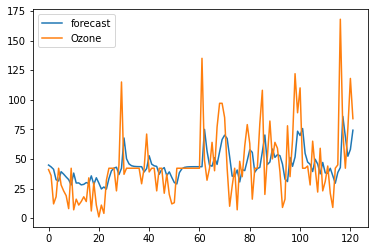

In [33]:
model.plot_predict()
plt.show()

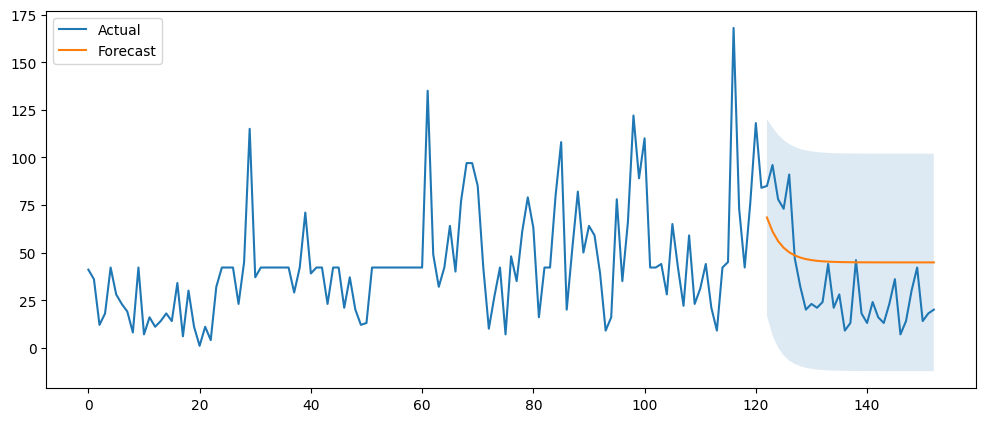

In [34]:
fc, se, conf = model.forecast(steps=len(test))
fc_series = pd.Series(fc, index=test.index)
lower = pd.Series(conf[:, 0], index=test.index)
upper = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(df["Ozone"], label="Actual")
plt.plot(fc_series, label="Forecast")
plt.fill_between(lower.index, lower, upper, alpha=.15)
plt.legend(loc='upper left')
plt.show()

In [ ]:
# 비트코인 분석

<AxesSubplot:>

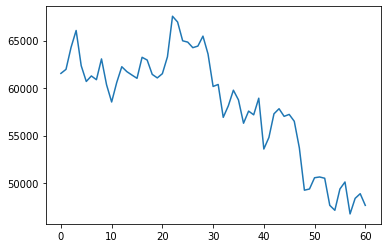

In [35]:
import pandas as pd

df = pd.read_csv("/Users/ian/Desktop/Study/data/coin/market-price.csv")
df['market-price'].plot()

<AxesSubplot:>

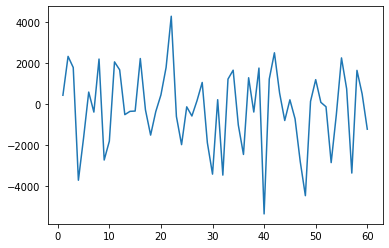

In [36]:
diff1 = df['market-price'].diff(periods=1).iloc[1:]
diff1.plot()

In [38]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

diff1 = np.log(df['market-price']).diff(periods=1).iloc[1:]
result = adfuller(diff1)
print(result)
print('ADF : %f'%result[0])
print('P-VALUE : %f'%result[1])

(-7.655575803936234, 1.7426891889269193e-11, 1, 58, {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}, -187.76931840945872)
ADF : -7.655576
P-VALUE : 0.000000


In [39]:
from pmdarima.arima import auto_arima

model = auto_arima(df["market-price"], suppress_warnings=True)
model

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [40]:
n = int(df.shape[0]*.8)
train = df[:n]
test = df[n:]
print(len(df['market-price']))
print(train['market-price'].values)
print(test['market-price'].values)

61
[61546.21 61971.59 64287.64 66063.56 62354.86 60697.06 61277.28 60884.18
 63070.54 60345.17 58538.49 60587.09 62249.18 61731.29 61373.44 61029.5
 63241.11 62954.86 61441.83 61072.32 61516.31 63293.22 67562.17 66954.11
 64976.73 64838.81 64254.67 64420.94 65468.75 63584.25 60172.26 60381.35
 56921.34 58133.02 59777.98 58755.9  56301.52 57578.22 57187.54 58935.45
 53588.21 54801.15 57292.28 57828.45 57025.79 57229.76 56508.48 53713.84]
[49253.86 49380.43 50564.63 50645.41 50511.12 47659.68 47137.46 49379.67
 50117.25 46757.09 48392.79 48884.66 47658.38]


In [41]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train["market-price"], order=(0,1,0)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.97227D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   8.972D+00
  F =   8.9722728058181502     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [42]:
fore = model.forecast(steps=5)
print(fore)

(array([53547.19382979, 53380.54765957, 53213.90148936, 53047.25531915,
       52880.60914894]), array([1907.09090316, 2697.03381993, 3303.17833893, 3814.18180632,
       4264.38489874]), array([[49809.36434435, 57285.02331523],
       [48094.45850743, 58666.63681172],
       [46739.79091055, 59688.01206817],
       [45571.59634827, 60522.91429003],
       [44522.56833119, 61238.64996668]]))


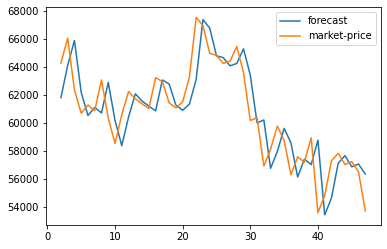

In [43]:
model.plot_predict()
plt.show()

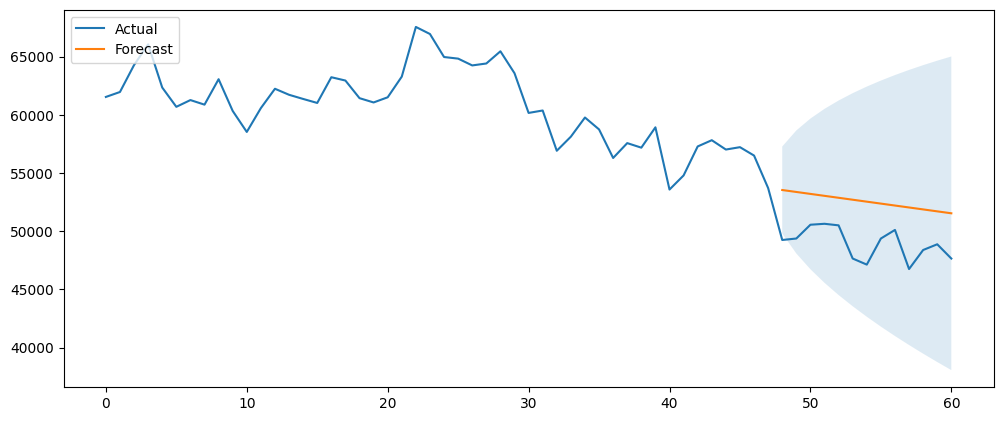

In [44]:
fc, se, conf = model.forecast(steps=len(test))
fc_series = pd.Series(fc, index=test.index)
lower = pd.Series(conf[:, 0], index=test.index)
upper = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(df["market-price"], label="Actual")
plt.plot(fc_series, label="Forecast")
plt.fill_between(lower.index, lower, upper, alpha=.15)
plt.legend(loc='upper left')
plt.show()